In [1]:
#load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import nltk
import string
import time
from nltk import word_tokenize #for word tokenize
from __future__ import division #for div
from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
from nltk.book import * #for FreqDist

# Pretty display for notebooks
%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#read data
data = pd.read_csv("companies.csv")

In [3]:
#show head of data
data.head()

,index,name,desc,keywords
0,0,Octagen,Operator of biopharmaceutical company. The com...,"['genetic disorder', 'blood clotting', 'hemoph..."
1,1,GeckoGo,Operator of an online travel website. The comp...,"['travel application', 'travel website', 'trav..."
2,2,Yantra,Provider of distributed order management and s...,"['distributed order management', 'supply chain..."
3,3,Insider Pages,Operator of online directory and reviews site ...,"['online search', 'local search', 'online dire..."
4,4,GrindMedia,Provider of online action sports and entertain...,"['entertainment content', 'sports']"


In [4]:
#get number of empty keyword columns:
print len(data[(data.keywords=='nan')])

0


In [5]:
#save desc to a single string
desc_str=''
for s in list(data['desc']):
    desc_str+=str(s).decode('utf-8')+' '

In [6]:
desc_str[1200:1300]

u'ding dentists, doctors, hairstylists, plumbers, realtors, and restaurants. It also provides pay-per-'

In [7]:
#tokenize string
token_desc = word_tokenize(desc_str)
#number of tokens
print len(token_desc)

189521


In [8]:
#get total unique vocab
vocab_desc = sorted(set(token_desc))
#print a subset of vocab_r
print vocab_desc[300:320]
#unique tokens
print len(vocab_desc)

[u'Alder', u'Algieplus', u'All', u'Allocate', u'Along', u'Alpha-1', u'Alpharadin', u'Also', u'Alzheimer\\', u'Alzheimer\u2018s', u'Alzheimer\u2019s', u'Amazon', u'Amblyopia', u'America', u'Americas', u'America\u2019s', u'Among', u'AmpliStor', u'Amur', u'Amyotrophic']
14282


In [9]:
#set token_desc as text_desc
text_desc=nltk.Text(token_desc)
#make sure len is same as token list, it is
len(text_desc)

189521

In [10]:
# calculate a measure of the lexical richness of the text
#distinct words/total amount of words
print len(set(text_desc))/ len(text_desc)

0.0753584035542


In [11]:
#get bigrams/colactions
text_desc.collocations()

company provides; company offers; company develops; also provides;
United States; company also; service providers; social media; company
operates; search engine; allows users; products include; company
engages; company focuses; also offers; real time; mobile phones;
company specializes; social networking; real estate


In [12]:
#get dist
fdist = FreqDist(text_desc)
print fdist

print fdist.most_common(50) 

<FreqDist with 14282 samples and 189521 outcomes>
[(u'.', 11067), (u'and', 10653), (u',', 9505), (u'of', 7502), (u'The', 5229), (u'company', 4481), (u'for', 3827), (u'to', 3572), (u'the', 3110), (u'a', 2713), (u'Provider', 2558), (u'services', 1972), (u'in', 1756), (u'provides', 1604), (u'Developer', 1450), (u'that', 1322), (u'software', 1306), (u'products', 1263), (u'offers', 1082), (u'platform', 1071), (u'as', 1007), (u'management', 985), (u'online', 928), (u'an', 922), (u"'s", 907), (u'technology', 879), (u'with', 859), (u'on', 846), (u'mobile', 729), (u'company\\', 715), (u'applications', 675), (u'is', 656), (u'their', 621), (u'data', 615), (u'systems', 591), (u'develops', 583), (u'solutions', 560), (u'also', 555), (u'which', 548), (u'It', 545), (u'service', 513), (u'(', 502), (u')', 501), (u'users', 484), (u'information', 456), (u'application', 444), (u'from', 441), (u'network', 439), (u'business', 432), (u'social', 407)]


In [25]:
#least common words
print fdist.most_common(14282)[-15:] 

[(u'junk', 1), (u'wireless-wireline', 1), (u'nourishment', 1), (u'Nemexia', 1), (u'WinterSweet', 1), (u'medications', 1), (u'airtight', 1), (u'anadvanced', 1), (u'priced', 1), (u'low-carbon', 1), (u'market-related', 1), (u'overloading', 1), (u'necrosis', 1), (u'photovolatics', 1), (u'UGC', 1)]


In [13]:
#show the word gun and some context
text_desc.concordance("products")

Displaying 25 of 1271 matches:
ort services . It offers Yantra 7x products , a comprehensive group of softwar
vider of semiconductor and imaging products . The company designs , manufactur
kets digital imaging semiconductor products for digital camera and mobile imag
broidery and imprinted promotional products . Developer of Web applications to
( IT ) process automation software products for the enterprises . The company 
tions and share discoveries of new products and services . Developer of video 
sion algorithms , technologies and products . The company offers algorithms , 
e . Manufacturer of larval therapy products used to treat wounds like diabetic
r agriculture . The company offers products that growers can use to increase q
 market research about companies , products , people and topics of interest . 
velops , manufactures and supplies products for use in security , detection an
cation equipment . The company\ 's products include mechanical interfaces , di
meet specific custome

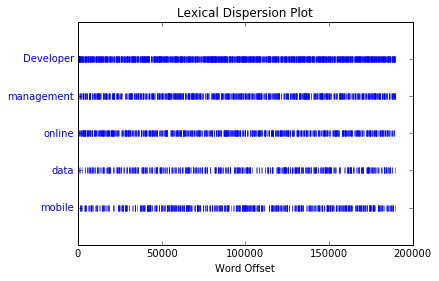

In [14]:
text_desc.dispersion_plot(["Developer", "management", "online", "data", "mobile"])

In [15]:
#get similar to data
text_desc.similar("data")

services applications software products content information technology
security internet business systems service wireless video network the
technologies solutions marketing support


In [16]:
#para for word cloud
limit = 50
bgcolor = '#000000'
title = 'Most frequent words Labels'
fontcolor='#fafafa'
infosize = 12

In [17]:
#add keywords together
data['keywords']=data['keywords'].apply(lambda x: x.replace(' ',''))
data['keywords']=data['keywords'].apply(lambda x: x.replace('[',''))
data['keywords']=data['keywords'].apply(lambda x: x.replace(']',''))
data['keywords']=data['keywords'].apply(lambda x: x.replace(',',' '))
data['keywords']=data['keywords'].apply(lambda x: x.replace("'",''))

In [18]:
k_str=''
for s in list(data['keywords']):
    k_str+=str(s)+' '

In [19]:
k_str[0:100]

'geneticdisorder bloodclotting hemophilia therapies travelapplication travelwebsite travelresource di'

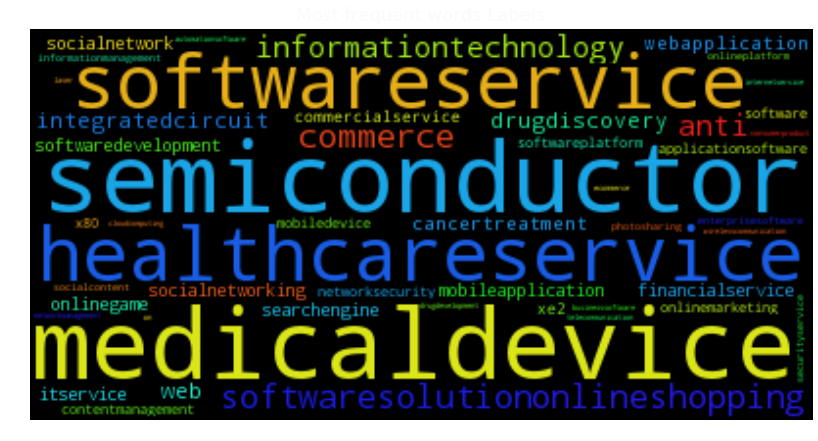

In [20]:
#word cloud of must common keywords
wordcloud = WordCloud(
    max_words=limit,
    stopwords=['nan'],
    #background_color=bgcolor,
    #font_path=font
).generate(k_str)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud)
plt.title(title, color=fontcolor, size=18, y=1.01)
#plt.annotate(footer, xy=(0, -.025), xycoords='axes fraction', fontsize=infosize, color=fontcolor)
plt.axis('off')
plt.show()

In [21]:
#get unique number of keywords
kw=k_str.split()
print len(kw)
print len(set(kw))

17772
12911


In [22]:
#average number of keywords per obs
print len(kw)/len(data)

3.5544
